# Activity 1.1 : Neural Networks

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

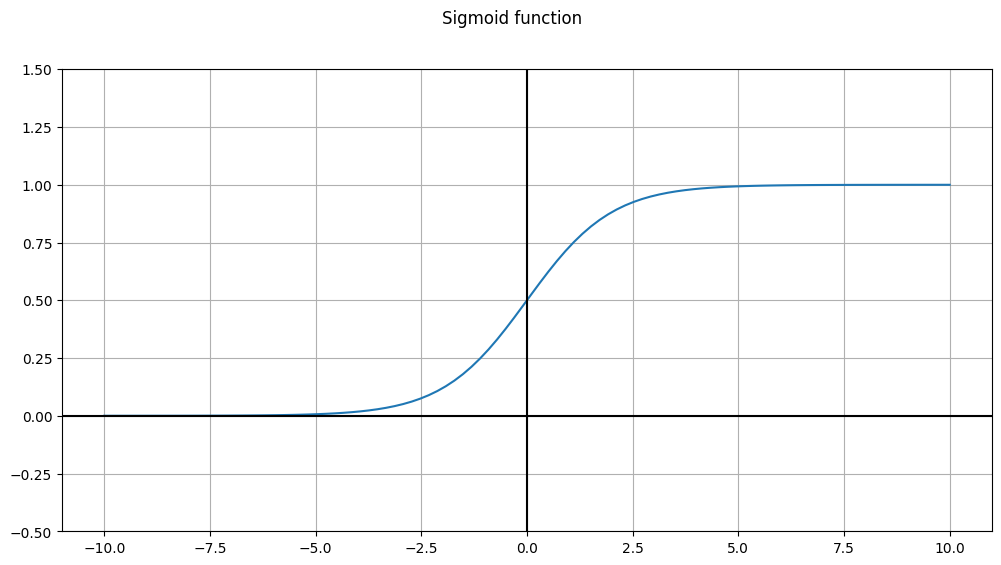

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [ ]:
def relu(x):
  """ReLU function"""
  return np.maximum(0, x)

Plot the activation function

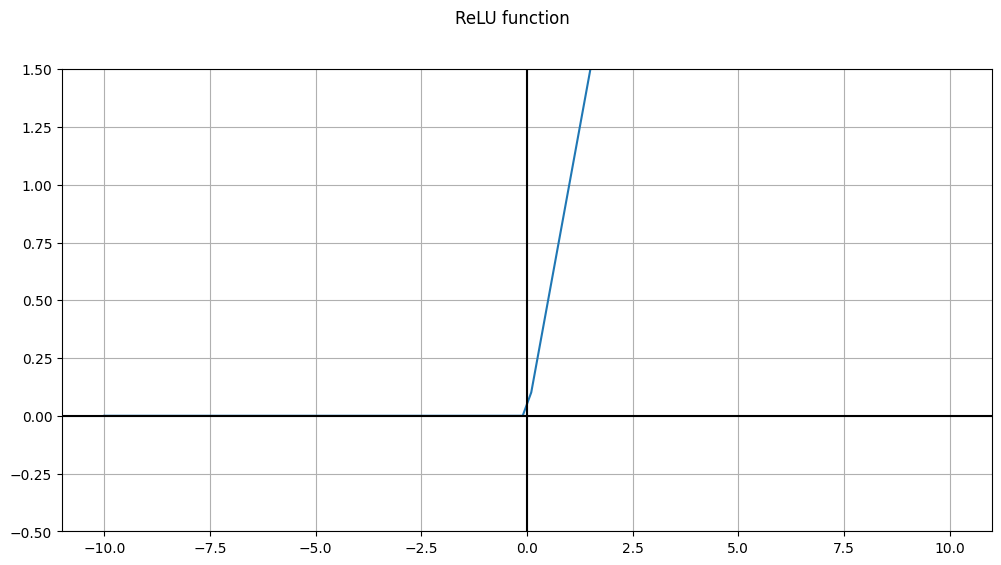

In [ ]:
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = relu(vals)
fig = plt.figure(figsize=(12, 6))
fig.suptitle('ReLU function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Interpretation:

I used ReLU as an activation replacing the sigmoid function, it is a non-linear model. The ReLU is known for its faster convergence compared to sigmoid, by replacing the activation with ReLU changes can be seen in the plotting. This can also result in an impact to overall network characteristics if we will use the ReLU in some task.

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 =  10
w2 = 10
b =  -15
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [ ]:
#NOR GATE
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


In [ ]:
#NAND GATE
w1 = -10
w2 = -10
b = 15
nand_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Interpretation:

by replacing/adjusting the weights and bias, the neuron can be configured to act as OR, AND, NAND gates.

## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
# Get the product of array x_in and W_1 (z2)
z2 = np.dot(x_in, W_1)
# Apply sigmoid function to z2 that results to a2
a2 = sigmoid(z2)
# Get the product of a2 and W_2 (z3) should be a2 and W_2 not a2 and z2
z3 = np.dot(a2, W_2)
# Apply sigmoid function to z3 that results to a3
a3 = sigmoid(z3)
# Get the product of a3 and W_3 that results to z4 should be a3 and W_3 not a3 and z3
z4 = np.dot(a3, W_3)

In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


Interpretation:

The code represents the feedforward process where we input the data and its transformed through multiple layers using weights, The final output is the z4 where each of it involvers different combination of inputs where we apply it to the sigmoid function to have the results.

7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
# Apply soft_max_vec function to z4 that results to y_out
y_out = soft_max_vec(z4)

In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

Interpretation:

Applying the softmax is a process where the final output of the neural network which is z4 to the sofmax function. Then it will convert it into rwa output values into probabilities, then we have the neural network computation where the entira forward pass of the nn_comp_vex takes an input vector which is x and applied it to the weights and to the sigmoid function, and the comp_mat also does the same thing but for the matrix of the input vectors.

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


In [ ]:
# 1. Initialize the weights to random values between -1 and 1
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (2, 4))
b1 = np.random.uniform(-1, 1, (1, 4))
W2 = np.random.uniform(-1, 1, (4, 1))
b2 = np.random.uniform(-1, 1, (1, 1))

# Activation and loss functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Data (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
learning_rate = 0.1
epochs = 5000

# Lists to store loss and accuracy values
losses = []
accuracies = []

# 6. Execute steps 2-5 for a fixed number of iterations (Training loop)
for i in range(epochs):
    # 2. Perform the feed-forward computation
    hidden_layer_input = X @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output @ W2 + b2
    output_layer_output = sigmoid(output_layer_input)

    # 3. Compute the loss function
    loss = log_loss(y, output_layer_output)
    losses.append(loss)

    # Calculate accuracy
    predictions = (output_layer_output > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

    # 4. Calculate the gradients for all the weights via back-propagation
    d_output = (output_layer_output - y) * sigmoid_derivative(output_layer_output)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(hidden_layer_output)

    # 5. Update the weight matrices (using a learning_rate parameter)
    W2 -= learning_rate * (hidden_layer_output.T @ d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 -= learning_rate * (X.T @ d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if (i + 1) % 1000 == 0:
        print(f"Iteration {i + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")


Iteration 1000: Loss = 0.6869, Accuracy = 0.5000
Iteration 2000: Loss = 0.6344, Accuracy = 0.7500
Iteration 3000: Loss = 0.3462, Accuracy = 1.0000
Iteration 4000: Loss = 0.1482, Accuracy = 1.0000
Iteration 5000: Loss = 0.0995, Accuracy = 1.0000


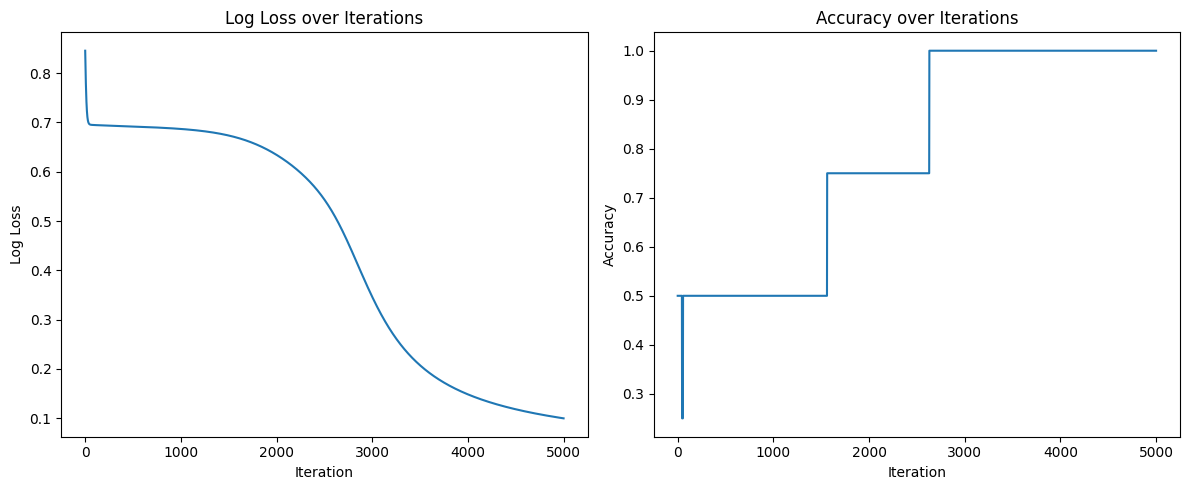

In [ ]:
# 7. Plot the accuracies and log loss and observe how they change over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

Once your code is running, try it for the different patterns below.

Which patterns was the neural network able to learn quickly and which took longer?
What learning rates and numbers of iterations worked well?

## XOR GATE

In [ ]:
# Data (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

Iteration 1000: Loss = 0.6869, Accuracy = 0.5000
Iteration 2000: Loss = 0.6344, Accuracy = 0.7500
Iteration 3000: Loss = 0.3462, Accuracy = 1.0000
Iteration 4000: Loss = 0.1482, Accuracy = 1.0000
Iteration 5000: Loss = 0.0995, Accuracy = 1.0000


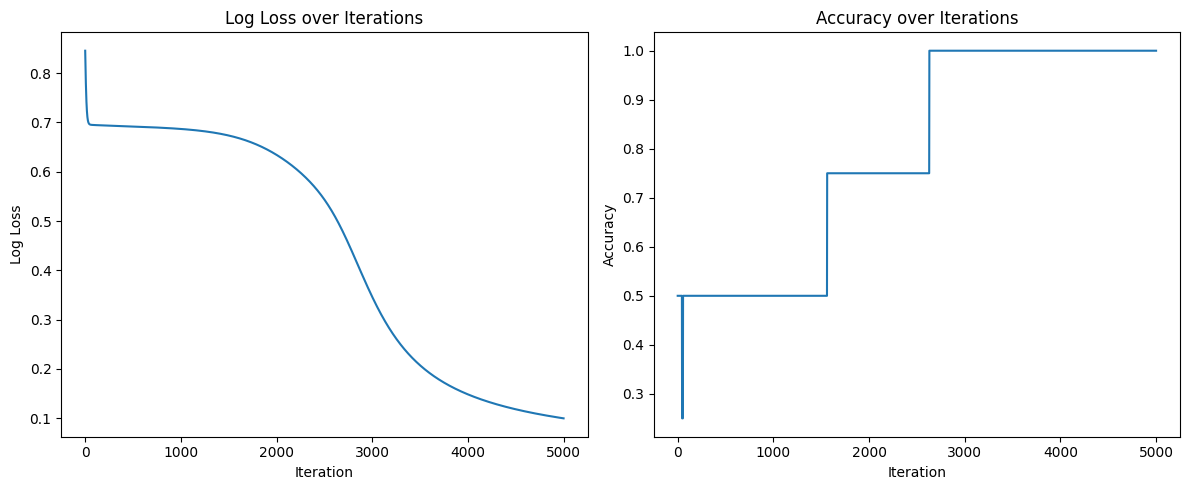

In [ ]:
# 1. Initialize the weights to random values between -1 and 1
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (2, 4))
b1 = np.random.uniform(-1, 1, (1, 4))
W2 = np.random.uniform(-1, 1, (4, 1))
b2 = np.random.uniform(-1, 1, (1, 1))

# Activation and loss functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Data (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
learning_rate = 0.1
epochs = 5000

# Lists to store loss and accuracy values
losses = []
accuracies = []

# 6. Execute steps 2-5 for a fixed number of iterations (Training loop)
for i in range(epochs):
    # 2. Perform the feed-forward computation
    hidden_layer_input = X @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output @ W2 + b2
    output_layer_output = sigmoid(output_layer_input)

    # 3. Compute the loss function
    loss = log_loss(y, output_layer_output)
    losses.append(loss)

    # Calculate accuracy
    predictions = (output_layer_output > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

    # 4. Calculate the gradients for all the weights via back-propagation
    d_output = (output_layer_output - y) * sigmoid_derivative(output_layer_output)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(hidden_layer_output)

    # 5. Update the weight matrices (using a learning_rate parameter)
    W2 -= learning_rate * (hidden_layer_output.T @ d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 -= learning_rate * (X.T @ d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if (i + 1) % 1000 == 0:
        print(f"Iteration {i + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# 7. Plot the accuracies and log loss and observe how they change over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


## AND GATE

In [ ]:
# Data (AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

Iteration 1000: Loss = 0.3748, Accuracy = 0.7500
Iteration 2000: Loss = 0.1222, Accuracy = 1.0000
Iteration 3000: Loss = 0.0686, Accuracy = 1.0000
Iteration 4000: Loss = 0.0498, Accuracy = 1.0000
Iteration 5000: Loss = 0.0401, Accuracy = 1.0000


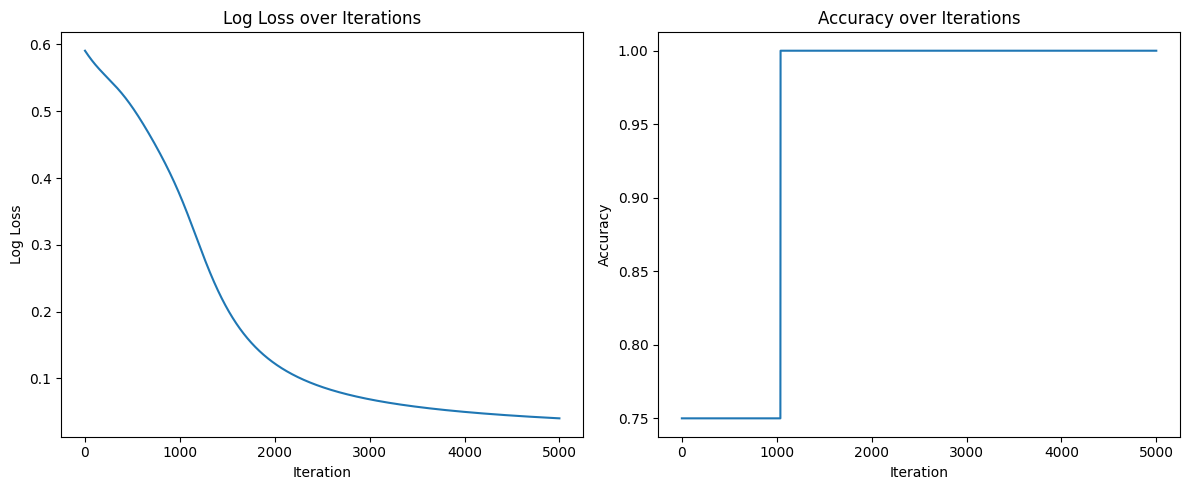

In [ ]:
# 1. Initialize the weights to random values between -1 and 1
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (2, 4))
b1 = np.random.uniform(-1, 1, (1, 4))
W2 = np.random.uniform(-1, 1, (4, 1))
b2 = np.random.uniform(-1, 1, (1, 1))

# Activation and loss functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Data (AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Hyperparameters
learning_rate = 0.1
epochs = 5000

# Lists to store loss and accuracy values
losses = []
accuracies = []

# 6. Execute steps 2-5 for a fixed number of iterations (Training loop)
for i in range(epochs):
    # 2. Perform the feed-forward computation
    hidden_layer_input = X @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output @ W2 + b2
    output_layer_output = sigmoid(output_layer_input)

    # 3. Compute the loss function
    loss = log_loss(y, output_layer_output)
    losses.append(loss)

    # Calculate accuracy
    predictions = (output_layer_output > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

    # 4. Calculate the gradients for all the weights via back-propagation
    d_output = (output_layer_output - y) * sigmoid_derivative(output_layer_output)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(hidden_layer_output)

    # 5. Update the weight matrices (using a learning_rate parameter)
    W2 -= learning_rate * (hidden_layer_output.T @ d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 -= learning_rate * (X.T @ d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if (i + 1) % 1000 == 0:
        print(f"Iteration {i + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# 7. Plot the accuracies and log loss and observe how they change over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


## NAND GATE

In [ ]:
# Data (NAND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

Iteration 1000: Loss = 0.2303, Accuracy = 1.0000
Iteration 2000: Loss = 0.0731, Accuracy = 1.0000
Iteration 3000: Loss = 0.0469, Accuracy = 1.0000
Iteration 4000: Loss = 0.0361, Accuracy = 1.0000
Iteration 5000: Loss = 0.0301, Accuracy = 1.0000


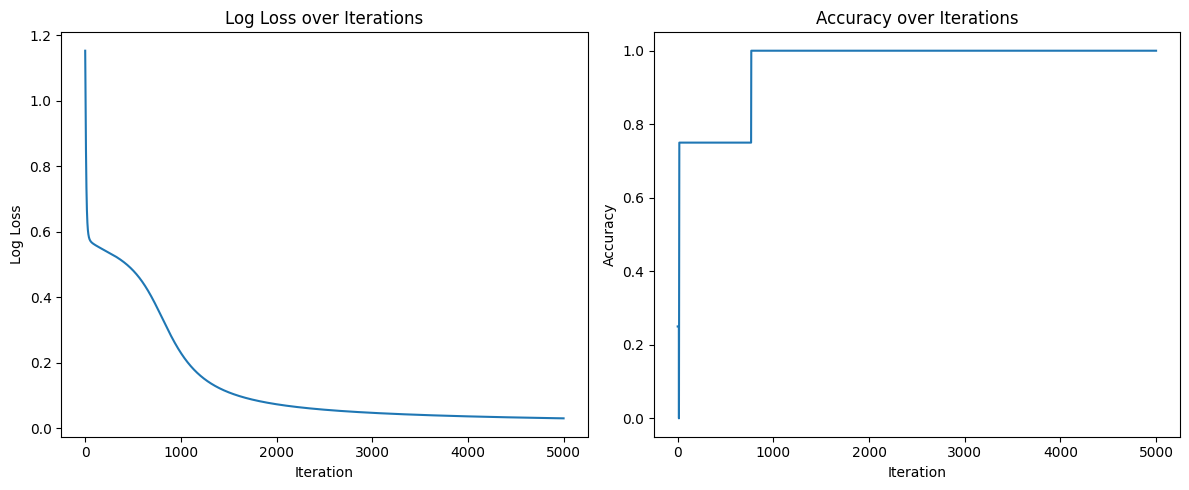

In [ ]:
# 1. Initialize the weights to random values between -1 and 1
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (2, 4))
b1 = np.random.uniform(-1, 1, (1, 4))
W2 = np.random.uniform(-1, 1, (4, 1))
b2 = np.random.uniform(-1, 1, (1, 1))

# Activation and loss functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Data (NAND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# Hyperparameters
learning_rate = 0.1
epochs = 5000

# Lists to store loss and accuracy values
losses = []
accuracies = []

# 6. Execute steps 2-5 for a fixed number of iterations (Training loop)
for i in range(epochs):
    # 2. Perform the feed-forward computation
    hidden_layer_input = X @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output @ W2 + b2
    output_layer_output = sigmoid(output_layer_input)

    # 3. Compute the loss function
    loss = log_loss(y, output_layer_output)
    losses.append(loss)

    # Calculate accuracy
    predictions = (output_layer_output > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

    # 4. Calculate the gradients for all the weights via back-propagation
    d_output = (output_layer_output - y) * sigmoid_derivative(output_layer_output)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(hidden_layer_output)

    # 5. Update the weight matrices (using a learning_rate parameter)
    W2 -= learning_rate * (hidden_layer_output.T @ d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 -= learning_rate * (X.T @ d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if (i + 1) % 1000 == 0:
        print(f"Iteration {i + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# 7. Plot the accuracies and log loss and observe how they change over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


## NOR GATE

In [ ]:
# Data (NOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1], [0], [0], [0]])

Iteration 1000: Loss = 0.1362, Accuracy = 1.0000
Iteration 2000: Loss = 0.0642, Accuracy = 1.0000
Iteration 3000: Loss = 0.0449, Accuracy = 1.0000
Iteration 4000: Loss = 0.0358, Accuracy = 1.0000
Iteration 5000: Loss = 0.0303, Accuracy = 1.0000


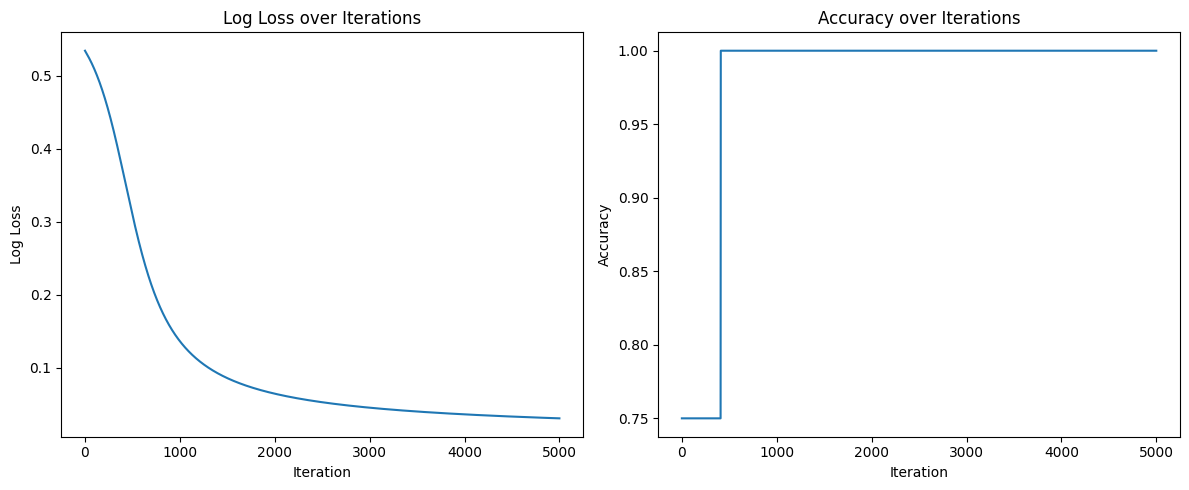

In [ ]:
# 1. Initialize the weights to random values between -1 and 1
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (2, 4))
b1 = np.random.uniform(-1, 1, (1, 4))
W2 = np.random.uniform(-1, 1, (4, 1))
b2 = np.random.uniform(-1, 1, (1, 1))

# Activation and loss functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Data (NOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1], [0], [0], [0]])

# Hyperparameters
learning_rate = 0.1
epochs = 5000

# Lists to store loss and accuracy values
losses = []
accuracies = []

# 6. Execute steps 2-5 for a fixed number of iterations (Training loop)
for i in range(epochs):
    # 2. Perform the feed-forward computation
    hidden_layer_input = X @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output @ W2 + b2
    output_layer_output = sigmoid(output_layer_input)

    # 3. Compute the loss function
    loss = log_loss(y, output_layer_output)
    losses.append(loss)

    # Calculate accuracy
    predictions = (output_layer_output > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

    # 4. Calculate the gradients for all the weights via back-propagation
    d_output = (output_layer_output - y) * sigmoid_derivative(output_layer_output)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(hidden_layer_output)

    # 5. Update the weight matrices (using a learning_rate parameter)
    W2 -= learning_rate * (hidden_layer_output.T @ d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 -= learning_rate * (X.T @ d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if (i + 1) % 1000 == 0:
        print(f"Iteration {i + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# 7. Plot the accuracies and log loss and observe how they change over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()



- Which patterns was the neural network able to learn quickly and which took longer?

The patterns that quickly learned AND, NAND, NOR, because there are all linearly separable patterns, which means they are more simple for the neural network to learn.
Once we run the code they were learned quicly from 1000 iterations reaching a 100% accuracy and its loss are seen decreasing in the early stages and it stabibilized quickly where it remained low throughout the optimal weight.

The slow learning pattern is XOR because of its non linearly pattern which resulted in making the neural network having difficulty to learning without multiple iterations. The XOR need aroud 3000 to 5000 to reach 100% accuracy and I saw a slow improvement in its loss and accuracy where its accuracy started in 50% and then it improved gradually by the 3000 iterations to achieve 100% accuracy.

- What learning rates and numbers of iterations worked well?

learning rate is 0.1 which worked well for all patterns and i tried different learning rate for the XOR but 0.1 is the closest and fastest as it can be which is more stable for all. It is also reasonable to use  0.1 because it was able to have steady decresed of loss and the networks was able to converge within 1000 to 5000 iterations.

AND, NAND, and NOR gates was acble to achieve 100% accuracy by 2000 iterations meaning the iterations were sufficient enough for the patterns to be learned but for the XOR it required more to reach 100%  accuracy but still all of the patterns are effective.

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-105-0f8bccfdade3>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-105-0f8bccfdade3>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


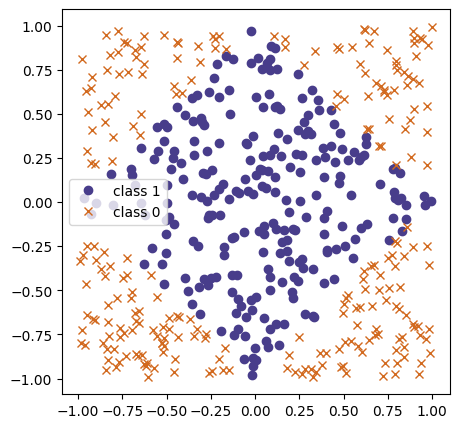

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

Iteration 0: Loss = 0.6931, Accuracy = 0.5036
Iteration 200: Loss = 0.6931, Accuracy = 0.5040
Iteration 400: Loss = 0.6931, Accuracy = 0.5040
Iteration 600: Loss = 0.6931, Accuracy = 0.5040
Iteration 800: Loss = 0.6933, Accuracy = 0.5040
Iteration 1000: Loss = 0.6986, Accuracy = 0.5040
Iteration 1200: Loss = 0.7200, Accuracy = 0.5040
Iteration 1400: Loss = 0.7532, Accuracy = 0.5040
Iteration 1600: Loss = 0.7763, Accuracy = 0.5040
Iteration 1800: Loss = 0.7940, Accuracy = 0.5040


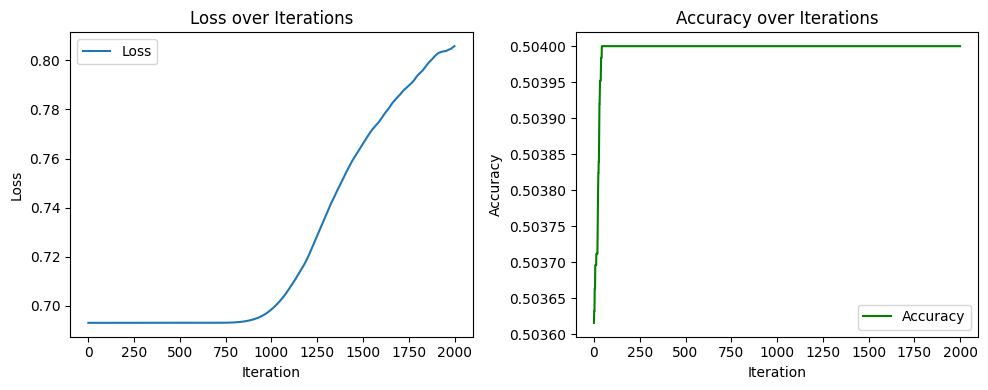

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize network parameters
np.random.seed(1241)
input_dim = 3  # Including the bias term
hidden_dim = 5
output_dim = 1

W_1 = np.random.randn(input_dim, hidden_dim) * 0.01
W_2 = np.random.randn(hidden_dim, output_dim) * 0.01
num_iter = 2000
learning_rate = 0.1

x_mat = x_mat_full

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# Accuracy computation
def accuracy(y_true, y_pred):
    return np.mean((y_pred > 0.5) == y_true)

# Lists to track loss and accuracy
loss_vals, accuracies = [], []

# Training loop
for i in range(num_iter):
    # Forward pass
    Z_1 = np.dot(x_mat, W_1)
    A_1 = relu(Z_1)
    Z_2 = np.dot(A_1, W_2)
    A_2 = sigmoid(Z_2)

    # Compute loss and accuracy
    loss = binary_cross_entropy(y, A_2)
    acc = accuracy(y, A_2)
    loss_vals.append(loss)
    accuracies.append(acc)

    # Backpropagation
    dZ_2 = A_2 - y.reshape(-1, 1)
    dW_2 = np.dot(A_1.T, dZ_2) / num_obs

    dA_1 = np.dot(dZ_2, W_2.T)
    dZ_1 = dA_1 * relu_derivative(Z_1)
    dW_1 = np.dot(x_mat.T, dZ_1) / num_obs

    # Update weights
    W_2 -= learning_rate * dW_2
    W_1 -= learning_rate * dW_1

    # Print progress
    if i % 200 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

# Plot loss and accuracy
def plot_loss_accuracy(loss_vals, accuracies):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].plot(loss_vals, label='Loss')
    ax[0].set_title('Loss over Iterations')
    ax[0].set_xlabel('Iteration')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(accuracies, label='Accuracy', color='green')
    ax[1].set_title('Accuracy over Iterations')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(loss_vals, accuracies)


Plot the predicted answers, with mistakes in yellow

<ipython-input-108-0b0d427c772f>:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_mat[pred0 & (y == 0), 0], x_mat[pred0 & (y == 0), 1],
<ipython-input-108-0b0d427c772f>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_mat[pred1 & (y == 0), 0], x_mat[pred1 & (y == 0), 1],


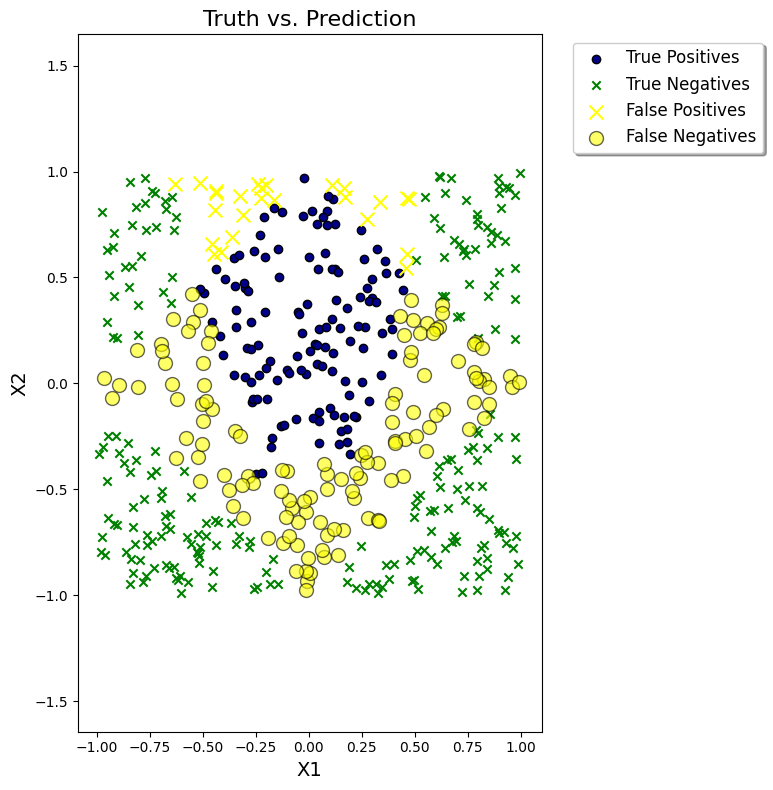

In [ ]:

y_pred = A_2.flatten()
pred1 = (y_pred >= 0.5)
pred0 = (y_pred < 0.5)

fig, ax = plt.subplots(figsize=(8, 8))

# Plot true predictions
ax.scatter(x_mat[pred1 & (y == 1), 0], x_mat[pred1 & (y == 1), 1],
           c='darkblue', label='True Positives', marker='o', edgecolor='k')
ax.scatter(x_mat[pred0 & (y == 0), 0], x_mat[pred0 & (y == 0), 1],
           c='green', label='True Negatives', marker='x', edgecolor='k')

# Plot false predictions
ax.scatter(x_mat[pred1 & (y == 0), 0], x_mat[pred1 & (y == 0), 1],
           c='yellow', label='False Positives', marker='x', s=100, edgecolor='k')
ax.scatter(x_mat[pred0 & (y == 1), 0], x_mat[pred0 & (y == 1), 1],
           c='yellow', label='False Negatives', marker='o', s=100, edgecolor='k', alpha=0.6)

# Customize plot
ax.set_title('Truth vs. Prediction', fontsize=16)
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)
ax.axis('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True, fontsize='large')
plt.tight_layout()
plt.show()


Interpretation:

The model performed very well at differentiating the center positive region with dark blue dots from the negative surrounding region green X's. The majority of errors yellow markers are located on the boundaries the false positives yellow X's appear near the boundary of the true negative region which is in the upper area, and the false negatives or yellow circles appear near the boundary of the true positive region which is in the middle to low area. These errors states that the model may be having trouble with the precision at the boundaries.


#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


Iteration 0: Loss = 0.6870, Accuracy = 0.5000
Iteration 300: Loss = 0.6679, Accuracy = 0.7500
Iteration 600: Loss = 0.6509, Accuracy = 0.7500
Iteration 900: Loss = 0.6313, Accuracy = 0.7500
Iteration 1200: Loss = 0.6081, Accuracy = 0.7500
Iteration 1500: Loss = 0.5803, Accuracy = 0.7500
Iteration 1800: Loss = 0.5470, Accuracy = 0.7500
Iteration 2100: Loss = 0.5074, Accuracy = 0.7500
Iteration 2400: Loss = 0.4618, Accuracy = 1.0000
Iteration 2700: Loss = 0.4114, Accuracy = 1.0000
Iteration 3000: Loss = 0.3590, Accuracy = 1.0000
Iteration 3300: Loss = 0.3083, Accuracy = 1.0000
Iteration 3600: Loss = 0.2621, Accuracy = 1.0000
Iteration 3900: Loss = 0.2222, Accuracy = 1.0000
Iteration 4200: Loss = 0.1890, Accuracy = 1.0000
Iteration 4500: Loss = 0.1618, Accuracy = 1.0000
Iteration 4800: Loss = 0.1398, Accuracy = 1.0000


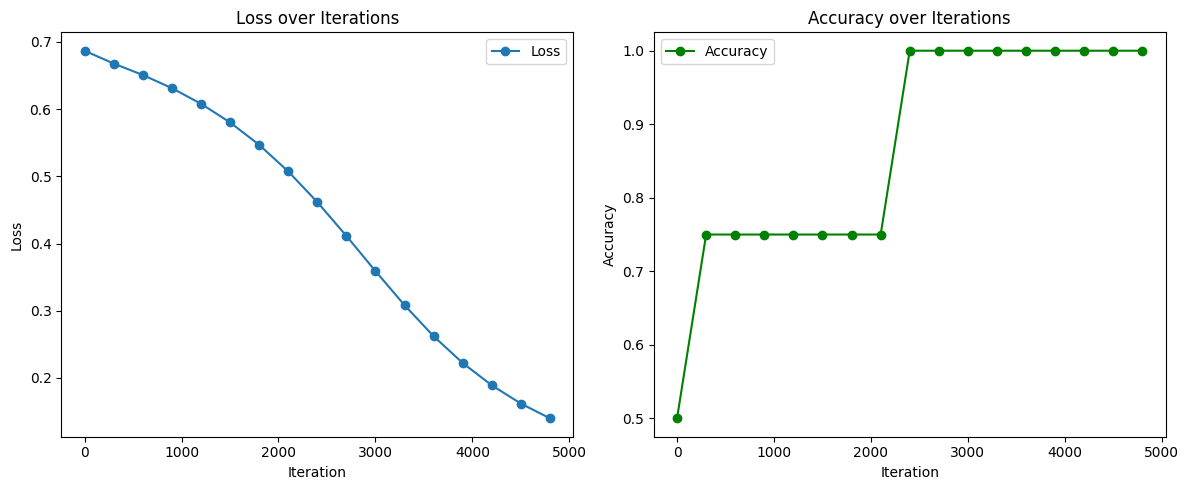

In [ ]:
# Initialize network parameters
np.random.seed(1241)
input_dim = 3
hidden_dim = 10
output_dim = 1

# Initialize weights with smaller random values
W_1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(1 / input_dim)
W_2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(1 / hidden_dim)
num_iter = 5000
learning_rate = 0.01

# data (eXOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
x_mat = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
num_obs = x_mat.shape[0]

# Activation functions
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# Accuracy computation
def accuracy(y_true, y_pred):
    return np.mean((y_pred > 0.5) == y_true)

# Lists to track loss and accuracy
loss_vals, accuracies = [], []

# Training loop
for i in range(num_iter):
    # Forward pass
    Z_1 = np.dot(x_mat, W_1)
    A_1 = tanh(Z_1)
    Z_2 = np.dot(A_1, W_2)
    A_2 = sigmoid(Z_2)

    # Compute loss and accuracy
    loss = binary_cross_entropy(y, A_2)
    acc = accuracy(y, A_2)

    # Track every 300th iteration
    if i % 300 == 0:
        loss_vals.append(loss)
        accuracies.append(acc)
        print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    # Backpropagation
    dZ_2 = A_2 - y
    dW_2 = np.dot(A_1.T, dZ_2) / num_obs

    dA_1 = np.dot(dZ_2, W_2.T)
    dZ_1 = dA_1 * tanh_derivative(Z_1)
    dW_1 = np.dot(x_mat.T, dZ_1) / num_obs

    # Update weights
    W_2 -= learning_rate * dW_2
    W_1 -= learning_rate * dW_1

# Plot loss and accuracy
def plot_loss_accuracy(loss_vals, accuracies):
    iterations = list(range(0, num_iter, 300))
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(iterations, loss_vals, label='Loss', marker='o')
    ax[0].set_title('Loss over Iterations')
    ax[0].set_xlabel('Iteration')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(iterations, accuracies, label='Accuracy', color='green', marker='o')
    ax[1].set_title('Accuracy over Iterations')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(loss_vals, accuracies)


Interpretation:

I modified the weights, inputs, and used the tanh activation function as it said in the ff use a different activation function. I used a smaller random weights to train the network, the tanh activation function, and the structured XOR dataset over 5000 iterations with feedforward and backpropagation. Loss and accuracy were tracked and plotted for every 300th iteration. The loss constantly decreased, which means that feedforward and backpropagation had minimized errors and improved predictions. Meanwhile, accuracy steadily increased as shown in the plotting where it looks like a staircase, reaching near 100% by the end, which shows that the network was able to learn and generalize the XOR pattern.  The plotted loss curve was downward, and the accuracy curve reflected steady improvement over time showing the successful application of the chosen setup and training methods.

#### Conclusion

This activity showed the neural networks, tools to solve very complex problems. I started with basic things like how individual neurons behave like little switches that make decisions using activation functions. I also studied how neurons can be combined to make simple logical operations.
I saw how these networks process information in a forward flow. The backpropagation where the network learned from its mistakes and adjusted its connections over time, gradually increase its accuracy with each iteration.
I also found out that some patterns are easier to learn for the networks, for example, simple linear, while some, like the XOR, may require more fine tuning. In this regard, I experimented with different settings, including a network's learning speed, and activation functions.
